In [3]:
import pandas as pd
import mysql.connector

# Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="#AlanAlvin1", 
    database="ecommerce_analytics"
)

# Load RFM data
query = "SELECT * FROM rfm_analysis;"
rfm = pd.read_sql(query, conn)

rfm.head()

C:\Users\Annika\AppData\Local\Temp\ipykernel_11540\3802045260.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  rfm = pd.read_sql(query, conn)


,CustomerID,Recency,Frequency,Monetary
0,12346,325,1,77183.60
1,12347,2,7,4310.00
2,12348,75,4,1797.24
3,12349,18,1,1757.55
4,12350,310,1,334.40


In [4]:
rfm.shape

(4338, 4)

In [5]:
from sklearn.preprocessing import StandardScaler

# Remove CustomerID (not a feature)
rfm_features = rfm[['Recency', 'Frequency', 'Monetary']]

# Scale data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

rfm_scaled[:5]

array([[ 2.32938811, -0.4250965 ,  8.35866818],
       [-0.90058811,  0.3544168 ,  0.25096626],
       [-0.17059349, -0.03533985, -0.02859601],
       [-0.74058929, -0.4250965 , -0.0330118 ],
       [ 2.17938921, -0.4250965 , -0.19134727]])

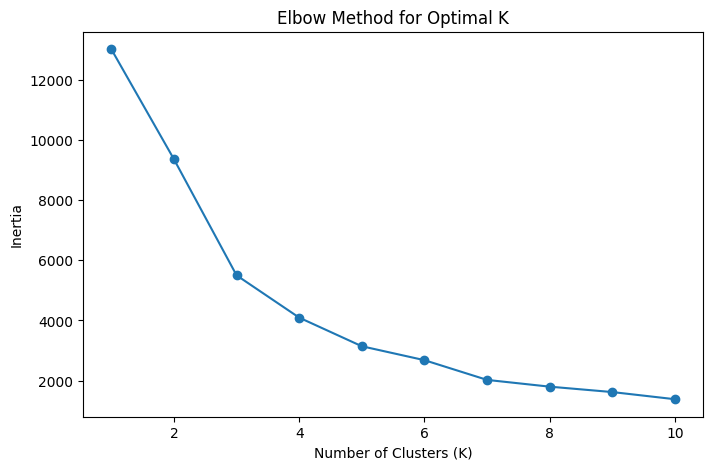

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

In [7]:
# Apply KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

rfm.head()

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346,325,1,77183.60,3
1,12347,2,7,4310.00,0
2,12348,75,4,1797.24,0
3,12349,18,1,1757.55,0
4,12350,310,1,334.40,1


In [9]:
rfm['Recency'] = pd.to_numeric(rfm['Recency'])
rfm['Frequency'] = pd.to_numeric(rfm['Frequency'])
rfm['Monetary'] = pd.to_numeric(rfm['Monetary'])

In [10]:
cluster_summary = rfm.groupby('Cluster')[['Recency','Frequency','Monetary']].mean()
cluster_summary

,Recency,Frequency,Monetary
Cluster,,,
0,43.433007,3.678758,1358.166912
1,248.173421,1.551367,478.194731
2,6.615385,82.538462,127338.313846
3,14.955882,22.333333,12709.090490


In [11]:
rfm['Cluster'].value_counts()

Cluster
0    3060
1    1061
3     204
2      13
Name: count, dtype: int64